# A Data-Driven Exploration of Customer Preferences on Restaurants
=======================================================================================================================

## CONTENTS
<br>
<div style="overflow: scroll; height: 500px;">
    
1. [BACKGROUND OF STUDY](#study)<br>
    a. [Problem Statement](#prob)<br><br>

2. [READING THE DATA](#read) <br>
    a. [Reading the CSV Files](#csv) <br>
    b. [Reading the XLSX File](#xlsx) <br>
    c. [Reading the TXT File](#txt) <br>
    d. [Reading the HTML File](#html) <br><br>

3. [UNDERSTANDING THE DATA](#data)<br><br>

4. [DATA PREPARATION](#prep)<br>
    a. [Renaming of Key Columns](#col)<br>
    b. [Creating New Column - BMI and Age](#new)<br>
    c. [Data Selection](#sel)<br>
    d. [Data Conversion](#conv)<br>
    e. [Handling Missing Values](#na)<br>
    f. [Checking for Outliers](#out)<br><br>

5. [COMBINING THE DATASETS](#comb)<br>
    a. [Checking for Duplicates](#dup)<br>
    b. [Merging of Datasets](#merge)<br><br>

6. [EXPLORATORY DATA ANALYSIS](#eda)<br>
    a. [Customer Profile](#prof)<br>
    b. [Cuisines Preferences](#cuis)<br>
    c. [Payment Method Preferences](#pay)<br>
    d. [Smoking and Drinking Profile](#smok)<br>
    e. [Customer Ratings on Restaurant](#rate)<br><br>

=======================================================================================================================
</div>

## BACKGROUND OF STUDY<a id='study'></a>

Restaurants provide customers with a variety of dining experiences, making them an essential component of the food service industry. It's critical to comprehend customer preferences in the restaurant business for a number of reasons. First and foremost, it enables managers and owners of restaurants to customize their offerings in terms of food, services, and marketing to better cater to the needs and expectations of their target market. Through the analysis of consumer preference data, including preferred cuisines, dining patterns and payment methods, restaurants can develop menu items that appeal to their patrons and foster a sense of satisfaction and loyalty.

### Problem Statement<a id='prob'></a> 
<br>

<div style="overflow: scroll; height: 200px;">
This project aims to enhance our comprehension of customer preferences and restaurant performance by exploring key questions using the provided datasets:

1. Profile customers by demographics such as age, marital status, BMI, and occupation.
2. Identify the most and least popular dishes on the menu to optimize offerings and pricing strategies for a restaurant chain.
3. Determine the proportion of restaurants offering the preferred cuisine.
4. Analyze the most and least preferred payment methods among customers.
5. Assess the proportion of restaurants offering the most preferred payment method.
6. Determine the proportion of customers who smoke and drink.
7. Identify restaurants that are open on weekend evenings, serve alcohol, and have a smoking area.
8. Summarize customer ratings for the restaurants.
    
</div>

## READING THE DATA<a id='read'></a>

<div style="overflow: scroll; height: 300px;">
The study will utilize datasets containing restaurant and customer information. The restaurant data consists of six datasets, with geoplaces2 serving as the primary dataset. The customer data comprises three datasets, with userprofile as the primary dataset. Additionally, the rating_final dataset will be used as a junction table.<br><br>

|  | **Restaurant Information** | **Customer Information** |
| -------- | -------- | -------- |
| **Main Datasets** | geoplaces2.csv| userprofile.xlsx |
| **Supplemental Datasets** | chefmozaccepts.csv | userpayment.txt |
|  | chefmozcuisine.csv | usercuisine.html |
|  | chefmozhours4.csv | |
|  | chefmozparking.csv |  |
| **Junction Dataset** | rating_final.csv | |

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

### Reading the CSV Files<a id='csv'></a> 

Let's load each .csv file into a pandas DataFrame and then store all the DataFrames in a dictionary. This approach provides a convenient method for storage and allows for quick referencing in the future.

In [2]:
data_files = [
    "chefmozaccepts.csv",
    "chefmozcuisine.csv",
    "chefmozhours4.csv",
    "chefmozparking.csv",
    "geoplaces2.csv",
    "rating_final.csv",
]

data = {}

for file in data_files:
    d = pd.read_csv("Restaurant Dataset/{0}".format(file))
    key = file.replace(".csv", "")
    data[key] = d
    
data

{'chefmozaccepts':       placeID             Rpayment
 0      135110                 cash
 1      135110                 VISA
 2      135110  MasterCard-Eurocard
 3      135110     American_Express
 4      135110     bank_debit_cards
 ...       ...                  ...
 1309   132012          Diners_Club
 1310   132002  MasterCard-Eurocard
 1311   132002                 Visa
 1312   132002     American_Express
 1313   132002          Diners_Club
 
 [1314 rows x 2 columns],
 'chefmozcuisine':      placeID        Rcuisine
 0     135110         Spanish
 1     135109         Italian
 2     135107  Latin_American
 3     135106         Mexican
 4     135105       Fast_Food
 ..       ...             ...
 911   132005         Seafood
 912   132004         Seafood
 913   132003   International
 914   132002         Seafood
 915   132001   Dutch-Belgian
 
 [916 rows x 2 columns],
 'chefmozhours4':       placeID         hours                  days
 0      135111  00:00-23:30;  Mon;Tue;Wed;Thu;Fri

### Reading the XLSX File<a id='xlsx'></a>
The user profile dataset is stored in a .xlsx format. To read this dataset correctly, we must the pandas.read_excel() function. It contains only one work sheet so we'll leave the argument to default.

In [3]:
userprofile = pd.read_excel("Restaurant Dataset/userprofile.xlsx")
userprofile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


### Reading the TXT File<a id='txt'></a>
The user payment dataset is stored in a .txt format. To read this dataset correctly, we must specify the encoding and delimiter using the sep="\t" parameter in the pandas.read_table() function.

In [4]:
userpayment = pd.read_table("Restaurant Dataset/userpayment.txt", sep="\t", encoding='utf-8')
userpayment.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


### Reading the HTML File<a id='html'></a>
The user cuisine dataset is stored in a .html format. To read the HTML file, we use the BeautifulSoup library to parse its content, creating a BeautifulSoup object that can be used to work with the document in a structured way.

In [5]:
## pip install beautifulsoup4

from bs4 import BeautifulSoup

with open('Restaurant Dataset/usercuisine.html', 'r') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table')
usercuisine = pd.read_html(str(table), header=0)[0]
usercuisine.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


For ease of access, we will add the three data files (.txt, .xlsx, and .html files) into the data dictionary.

In [6]:
data['userprofile'] = userprofile
data['userpayment'] = userpayment
data['usercuisine'] = usercuisine

## UNDERSTANDING THE DATA<a id='data'></a>

In [7]:
for key, value in data.items():
    print("\n\033[1m", key, "\033[0m")
    display(value.head(3))
    print("\033[1mNumber of rows:\033[0m", value.shape[0], "\n\033[1mNumber of columns:\033[0m", value.shape[1])
    print("\033[1mColumn names:\033[0m")
    print(list(value.columns))
    print("\033[1mData types:\033[0m")
    print(value.dtypes)
    print("\033[1mMissing values represented as '?':\033[0m")
    print(value.isin(['?']).sum())


 chefmozaccepts 


,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard


Number of rows: 1314 
Number of columns: 2
Column names:
['placeID', 'Rpayment']
Data types:
placeID      int64
Rpayment    object
dtype: object
Missing values represented as '?':
placeID     0
Rpayment    0
dtype: int64

 chefmozcuisine 


,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American


Number of rows: 916 
Number of columns: 2
Column names:
['placeID', 'Rcuisine']
Data types:
placeID      int64
Rcuisine    object
dtype: object
Missing values represented as '?':
placeID     0
Rcuisine    0
dtype: int64

 chefmozhours4 


,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;


Number of rows: 2339 
Number of columns: 3
Column names:
['placeID', 'hours', 'days']
Data types:
placeID     int64
hours      object
days       object
dtype: object
Missing values represented as '?':
placeID    0
hours      0
days       0
dtype: int64

 chefmozparking 


,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none


Number of rows: 702 
Number of columns: 2
Column names:
['placeID', 'parking_lot']
Data types:
placeID         int64
parking_lot    object
dtype: object
Missing values represented as '?':
placeID        0
parking_lot    0
dtype: int64

 geoplaces2 


,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none


Number of rows: 130 
Number of columns: 21
Column names:
['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address', 'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise', 'area', 'other_services']
Data types:
placeID             int64
latitude          float64
longitude         float64
the_geom_meter     object
name               object
address            object
city               object
state              object
country            object
fax                object
zip                object
alcohol            object
smoking_area       object
dress_code         object
accessibility      object
price              object
url                object
Rambience          object
franchise          object
area               object
other_services     object
dtype: object
Missing values represented as '?':
placeID             0
latitude            0
longitude           0
the_geom_meter      0
name  

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2


Number of rows: 1161 
Number of columns: 5
Column names:
['userID', 'placeID', 'rating', 'food_rating', 'service_rating']
Data types:
userID            object
placeID            int64
rating             int64
food_rating        int64
service_rating     int64
dtype: object
Missing values represented as '?':
userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

 userprofile 


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69


Number of rows: 138 
Number of columns: 19
Column names:
['userID', 'latitude', 'longitude', 'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'birth_year', 'interest', 'personality', 'religion', 'activity', 'color', 'weight', 'budget', 'height']
Data types:
userID               object
latitude            float64
longitude           float64
smoker               object
drink_level          object
dress_preference     object
ambience             object
transport            object
marital_status       object
hijos                object
birth_year            int64
interest             object
personality          object
religion             object
activity             object
color                object
weight                int64
budget               object
height              float64
dtype: object
Missing values represented as '?':
userID               0
latitude             0
longitude            0
smoker               3
drink_level          

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash


Number of rows: 177 
Number of columns: 2
Column names:
['userID', 'Upayment']
Data types:
userID      object
Upayment    object
dtype: object
Missing values represented as '?':
userID      0
Upayment    0
dtype: int64

 usercuisine 


,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican


Number of rows: 330 
Number of columns: 2
Column names:
['userID', 'Rcuisine']
Data types:
userID      object
Rcuisine    object
dtype: object
Missing values represented as '?':
userID      0
Rcuisine    0
dtype: int64


<div style="overflow: scroll; height: 300px;">
After reviewing all the datasets, we have identified several necessary data preparation steps:

* **Exclusion of chefmozparking dataset:** We will not utilize the chefmozparking dataset to address our research question.
* **Column renaming:** To avoid confusion, we will rename the 'cuisine' and 'payment' columns in both the usercuisine, chefmozcuisine, userpayment, and chefmozaccepts datasets.
* **Creation of a new 'bmi' and 'age' column:** Based on 'weight', 'height' and 'birth_year' data from the userprofile dataset, we will create a new 'bmi' and 'age' column.
* **Column dropping in geoplaces2 and userprofile datasets:** We will drop unnecessary columns from the geoplaces2 and userprofile datasets for our study.
* **Conversion of 'hours' column in chefmozhours4 dataset:** The hours column in the chefmozhours4 dataset will be converted to a datetime object.
* **Handling of missing values:** Both the geoplaces2 and userprofile dataset have missing values which needs to be handled accordingly.
* **Merging data using unique IDs:** Restaurants and customers have a unique ID (i.e., placeID and userID). We will merge the necessary data into one table using these IDs as the primary key.

</div>

## DATA PREPARATION<a id='prep'></a>

### Renaming of Key Columns<a id='prep'></a>
We are renaming the payment method columns in the chefmozaccepts and userpayment datasets to emphasize the distinction, as not doing so could lead to confusion in references.

In [8]:
data['chefmozaccepts'] = data['chefmozaccepts'].rename(columns={'Rpayment': 'accepted_payment'})
data['chefmozaccepts'].head(1)

,placeID,accepted_payment
0,135110,cash


In [9]:
data['userpayment'] = data['userpayment'].rename(columns={'Upayment': 'preferred_payment'})
data['userpayment'].head(1)

,userID,preferred_payment
0,U1001,cash


We are also updating the cuisine columns in the chefmozcuisine and usercuisine datasets to avoid confusion, as both currently refer to 'Rcuisine' columns without clear distinction.

In [10]:
data['chefmozcuisine'] = data['chefmozcuisine'].rename(columns={'Rcuisine': 'cuisine_offered'})
data['chefmozcuisine'].head(1)

,placeID,cuisine_offered
0,135110,Spanish


In [11]:
data['usercuisine'] = data['usercuisine'].rename(columns={'Rcuisine': 'preferred_cuisine'})
data['usercuisine'].head(1)

,userID,preferred_cuisine
0,U1001,American


### Creating New Column - BMI and Age<a id='new'></a>
To address problem statement 1, we will create new columns derived from the 'weight', 'height', and 'birth_year' data in the userprofile dataset. Specifically, we will calculate the Body Mass Index (BMI) using the formula BMI = weight(kg) / (height(m)^2) and create a new 'bmi' column. Additionally, we will calculate the age of each user by subtracting their 'birth_year' from the current year and create a new 'age' column.

In [12]:
data['userprofile']['bmi'] = (data['userprofile']['weight'] / (data['userprofile']['height'])**2).round(2)
data['userprofile']['age'] = 2024 - data['userprofile']['birth_year']
data['userprofile'].head(1)

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,interest,personality,religion,activity,color,weight,budget,height,bmi,age
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,variety,thrifty-protector,none,student,black,69,medium,1.77,22.02,35


### Data Selection<a id='sel'></a>
We will remove irrelevant columns from the geoplaces2 and userprofile datasets for our study. Several columns are not pertinent to our analysis and can be safely dropped.

In [13]:
columns_to_drop1 = ['latitude', 'longitude', 'the_geom_meter', 'address', 'city', 'state', 'country', 'fax', 'zip', 'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise', 'area', 'other_services']
data['geoplaces2'].drop(columns=columns_to_drop1, axis=1, inplace=True)
data['geoplaces2'].head(1)

,placeID,name,alcohol,smoking_area
0,134999,Kiku Cuernavaca,No_Alcohol_Served,none


In [14]:
columns_to_drop2 = ['latitude', 'longitude', 'hijos', 'birth_year', 'dress_preference', 'ambience', 'transport', 'interest', 'personality', 'religion', 'color', 'weight', 'budget', 'height']
data['userprofile'].drop(columns=columns_to_drop2, axis=1, inplace=True)
data['userprofile'].head(1)

,userID,smoker,drink_level,marital_status,activity,bmi,age
0,U1001,false,abstemious,single,student,22.02,35


### Data Conversion<a id='conv'></a>
The hours column in the chefmozhours4 dataset will be converted to a datetime object to facilitate easier manipulation and analysis.

In [15]:
# Extract and separate opening and closing hours
data['chefmozhours4']['opening_time'] = data['chefmozhours4']['hours'].str.extract(r'(\d{2}:\d{2})-(\d{2}:\d{2})')[0]
data['chefmozhours4']['closing_time'] = data['chefmozhours4']['hours'].str.extract(r'(\d{2}:\d{2})-(\d{2}:\d{2})')[1]

In [16]:
data['chefmozhours4']['opening_time'] = pd.to_datetime(data['chefmozhours4']['opening_time'], format='%H:%M')
data['chefmozhours4']['closing_time'] = pd.to_datetime(data['chefmozhours4']['closing_time'], format='%H:%M')

data['chefmozhours4'][['closing_time', 'opening_time']].dtypes

closing_time    datetime64[ns]
opening_time    datetime64[ns]
dtype: object

Now we can go ahead and drop the individual 'hours' columns as we no longer need them.

In [17]:
data['chefmozhours4'].drop('hours', axis=1, inplace=True)
data['chefmozhours4'].head(1)

,placeID,days,opening_time,closing_time
0,135111,Mon;Tue;Wed;Thu;Fri;,1900-01-01,1900-01-01 23:30:00


### Handling Missing Values<a id='na'></a>
Since missing values in the geoplaces dataset were addressed by dropping columns with missing values, we only need to handle missing values in the userprofile dataset by removing rows with missing values. The missing values in this dataset are represented by '?', so we will use numpy.nan to replace this indicator.

In [18]:
data['userprofile'] = data['userprofile'].replace('?', np.nan)

missing_values_userprofile = data['userprofile'].isnull().sum()
print("Missing values in userprofile dataset:")
print(missing_values_userprofile[missing_values_userprofile > 0])

Missing values in userprofile dataset:
smoker            3
marital_status    4
activity          7
dtype: int64


Original shape of userprofile dataset is (138, 19) so we can confirm that rows with missing values have been removed.

In [19]:
data['userprofile'].dropna(inplace=True)
data['userprofile'].shape

(131, 7)

### Checking for Outliers<a id='out'></a>

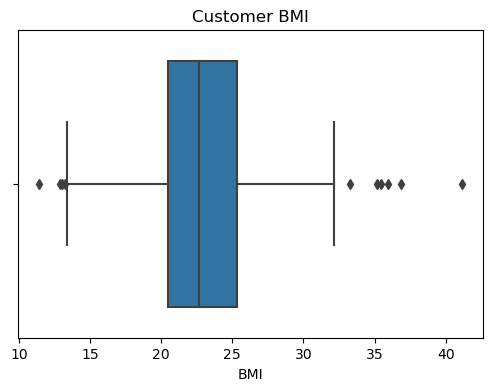

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['userprofile']['bmi'])
plt.title('Customer BMI')
plt.xlabel('BMI')
plt.show()

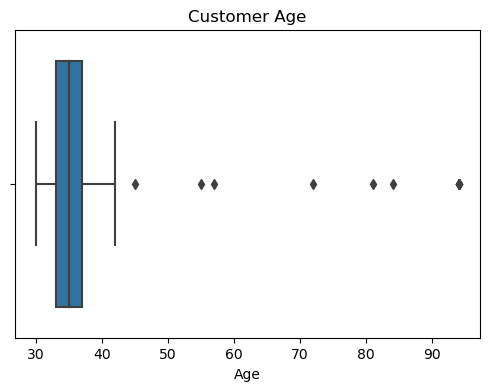

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['userprofile']['age'])
plt.title('Customer Age')
plt.xlabel('Age')
plt.show()

In [22]:
# Calculate z-scores for age and bmi
df_z_score_age = stats.zscore(data['userprofile']['age'])
df_z_score_bmi = stats.zscore(data['userprofile']['bmi'])

# Create a DataFrame with age, bmi, and z-scores
df_data = pd.DataFrame({'age': data['userprofile']['age'], 'bmi': data['userprofile']['bmi']})
df_data["z_score_age"] = df_z_score_age
df_data["z_score_bmi"] = df_z_score_bmi

df_data

,age,bmi,z_score_age,z_score_bmi
0,35,22.02,-0.269919,-0.227677
1,34,11.44,-0.344992,-2.326064
2,35,21.01,-0.269919,-0.427995
3,84,18.80,3.408663,-0.866316
4,32,22.76,-0.495139,-0.080909
...,...,...,...,...
133,33,19.10,-0.420066,-0.806816
134,36,27.83,-0.194846,0.924651
135,34,19.53,-0.344992,-0.721532
136,35,22.72,-0.269919,-0.088842


In [23]:
print("Number of z-scores above 3 and below -3 for BMI:", ((df_z_score_bmi > 3) | (df_z_score_bmi < -3)).sum())
print("Number of z-scores above 3 and below -3 for Age:", ((df_z_score_age > 3) | (df_z_score_age < -3)).sum())

Number of z-scores above 3 and below -3 for BMI: 1
Number of z-scores above 3 and below -3 for Age: 7


In [24]:
# Filter out rows with z-scores outside the range [-3, 3]
filtered_indices = ((df_z_score_age <= 3) & (df_z_score_age >= -3)) & ((df_z_score_bmi <= 3) & (df_z_score_bmi >= -3))
data['userprofile'] = data['userprofile'][filtered_indices]
data['userprofile']

,userID,smoker,drink_level,marital_status,activity,bmi,age
0,U1001,false,abstemious,single,student,22.02,35
1,U1002,false,abstemious,single,student,11.44,34
2,U1003,false,social drinker,single,student,21.01,35
4,U1005,false,abstemious,single,student,22.76,32
5,U1006,true,social drinker,single,student,23.15,35
...,...,...,...,...,...,...,...
133,U1134,false,casual drinker,single,student,19.10,33
134,U1135,false,casual drinker,single,student,27.83,36
135,U1136,true,social drinker,single,student,19.53,34
136,U1137,false,social drinker,single,student,22.72,35


## COMBINING THE DATASETS<a id='comb'></a>

### Checking for Duplicates<a id='dup'></a>
First, we need to verify if our main datasets contain unique primary keys. We use placeID as the primary key for geoplaces2 dataset and userID for userprofile dataset.

In [25]:
data['userprofile'][data['userprofile']['userID'].duplicated()]

,userID,smoker,drink_level,marital_status,activity,bmi,age


In [26]:
data['geoplaces2'][data['geoplaces2']['placeID'].duplicated()]

,placeID,name,alcohol,smoking_area


We can see from above that both datasets don't have any duplicated values for the primary keys - userID and placeID. Let's go on ahead to check the number of unique values for each dataset.

In [27]:
unique_userID_count = data['userprofile']['userID'].nunique()
unique_placeID_count = data['geoplaces2']['placeID'].nunique()

print("Number of unique values of userID in userprofile dataset:", unique_userID_count)
print("Number of unique values of placeID in geoplaces2 dataset:", unique_placeID_count)

Number of unique values of userID in userprofile dataset: 123
Number of unique values of placeID in geoplaces2 dataset: 130


### Merging of Datasets<a id='merge'></a>
Our approach for merging the datasets is to start with our junction table (rating_final), which contains both the userID and placeID. This table serves as the bridge to connect the customer information datasets with the restaurant information datasets. Subsequently, we will systematically incorporate each pre-processed dataset using the inner join method.

In [28]:
# Merge rating_final with userprofile
final_table = pd.merge(data['rating_final'], data['userprofile'], on='userID', how='inner')

# Merge with geoplaces2
final_table = pd.merge(final_table, data['geoplaces2'], on='placeID', how='inner')

# Merge with chefmozhours4
final_table = pd.merge(final_table, data['chefmozhours4'], on='placeID', how='inner')

# Merge with chefmozcuisine
final_table = pd.merge(final_table, data['chefmozcuisine'], on='placeID', how='inner')

# Merge with chefmozaccepts
final_table = pd.merge(final_table, data['chefmozaccepts'], on='placeID', how='inner')

# Merge with userpayment
final_table = pd.merge(final_table, data['userpayment'], on='userID', how='inner')

# Merge with usercuisine
final_table = pd.merge(final_table, data['usercuisine'], on='userID', how='inner')

# Display the final merged dataset
final_table


,userID,placeID,rating,food_rating,service_rating,smoker,drink_level,marital_status,activity,bmi,...,name,alcohol,smoking_area,days,opening_time,closing_time,cuisine_offered,accepted_payment,preferred_payment,preferred_cuisine
0,U1077,135085,2,2,2,false,social drinker,married,student,22.23,...,Tortas Locas Hipocampo,No_Alcohol_Served,not permitted,Mon;Tue;Wed;Thu;Fri;,1900-01-01,1900-01-01 00:00:00,Fast_Food,cash,VISA,Mexican
1,U1077,135085,2,2,2,false,social drinker,married,student,22.23,...,Tortas Locas Hipocampo,No_Alcohol_Served,not permitted,Mon;Tue;Wed;Thu;Fri;,1900-01-01,1900-01-01 00:00:00,Fast_Food,cash,cash,Mexican
2,U1077,135085,2,2,2,false,social drinker,married,student,22.23,...,Tortas Locas Hipocampo,No_Alcohol_Served,not permitted,Mon;Tue;Wed;Thu;Fri;,1900-01-01,1900-01-01 00:00:00,Fast_Food,cash,bank_debit_cards,Mexican
3,U1077,135085,2,2,2,false,social drinker,married,student,22.23,...,Tortas Locas Hipocampo,No_Alcohol_Served,not permitted,Sat;,1900-01-01,1900-01-01 00:00:00,Fast_Food,cash,VISA,Mexican
4,U1077,135085,2,2,2,false,social drinker,married,student,22.23,...,Tortas Locas Hipocampo,No_Alcohol_Served,not permitted,Sat;,1900-01-01,1900-01-01 00:00:00,Fast_Food,cash,cash,Mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24259,U1047,132875,0,0,0,false,abstemious,single,student,22.58,...,shi ro ie,Wine-Beer,section,Sun;,1900-01-01,1900-01-01 23:30:00,Japanese,cash,cash,American
24260,U1047,132875,0,0,0,false,abstemious,single,student,22.58,...,shi ro ie,Wine-Beer,section,Sun;,1900-01-01,1900-01-01 23:30:00,Japanese,VISA,cash,American
24261,U1047,132875,0,0,0,false,abstemious,single,student,22.58,...,shi ro ie,Wine-Beer,section,Sun;,1900-01-01,1900-01-01 23:30:00,Japanese,MasterCard-Eurocard,cash,American
24262,U1047,132875,0,0,0,false,abstemious,single,student,22.58,...,shi ro ie,Wine-Beer,section,Sun;,1900-01-01,1900-01-01 23:30:00,Japanese,American_Express,cash,American


In [29]:
final_table.to_csv('final_table.csv', index=False)

## EXPLORATORY DATA ANALYSIS<a id='eda'></a>


### Customer Profile<a id='prof'></a>
The following presents customer profiles based on demographics including age, marital status, BMI, and occupation.

#### _Age Distribution_

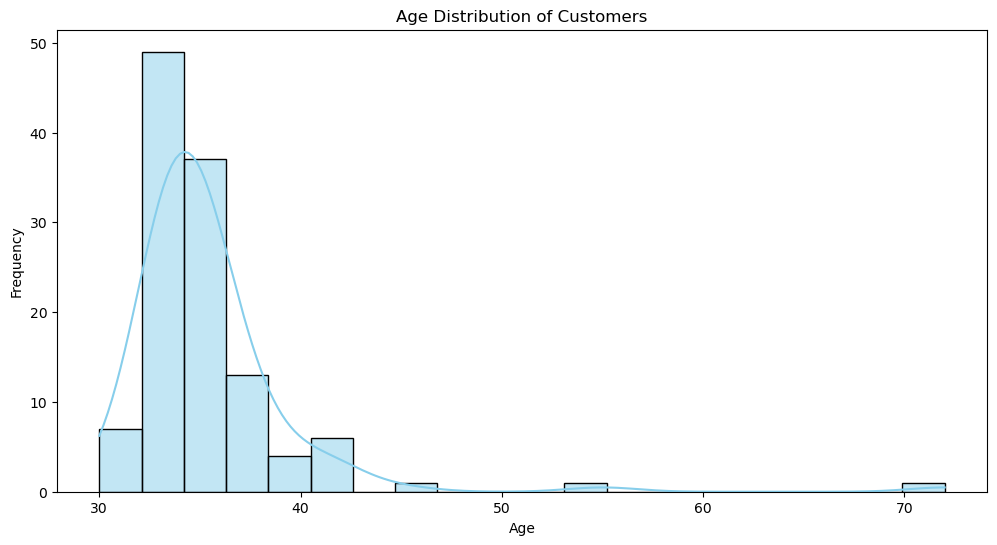

In [30]:
age_by_userID = final_table.groupby('userID')['age'].first()

# Plot the age distribution for each userID
plt.figure(figsize=(12, 6))
sns.histplot(age_by_userID, bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### _Marital Status_

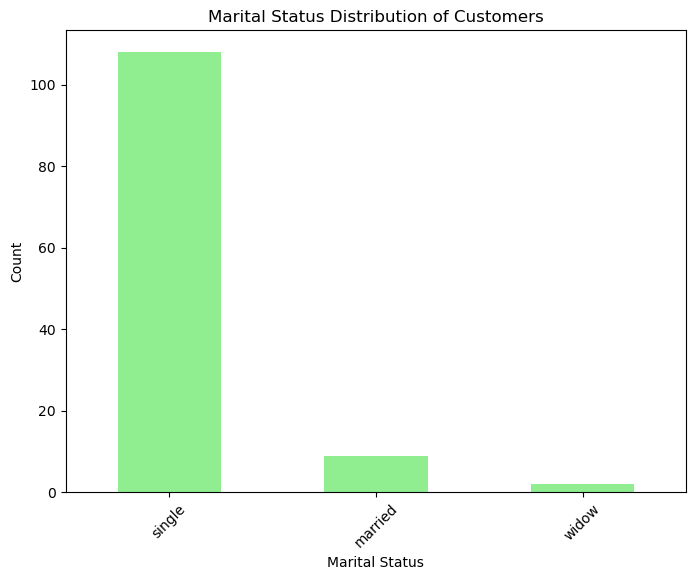

In [31]:
maritals_by_userID = final_table.groupby('userID')['marital_status'].first().value_counts()

# Plot the marital distribution for each userID
plt.figure(figsize=(8, 6))
maritals_by_userID.plot(kind='bar', color='lightgreen')
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### _BMI Distribution_ 

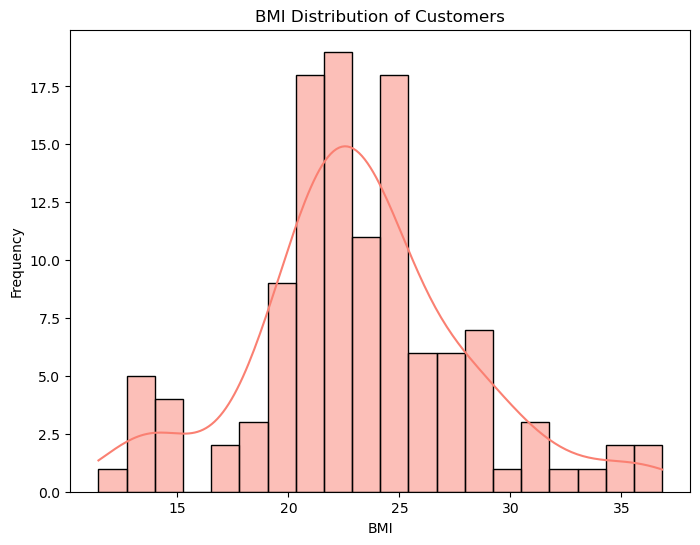

In [32]:
bmi_by_userID = final_table.groupby('userID')['bmi'].first()

plt.figure(figsize=(8, 6))
sns.histplot(bmi_by_userID, bins=20, kde=True, color='salmon')
plt.title('BMI Distribution of Customers')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

#### _Occupation Distribution_ 

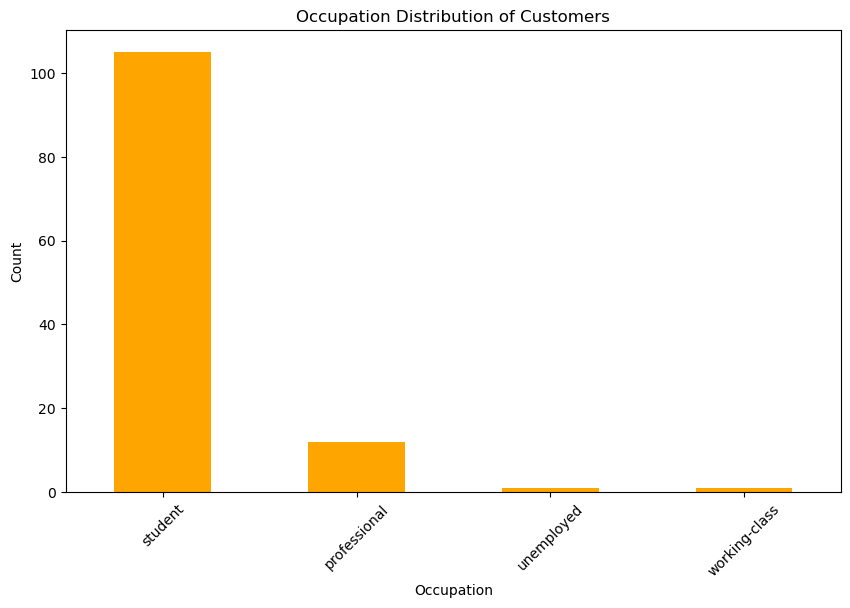

In [33]:
occupation_by_userID = final_table.groupby('userID')['activity'].first().value_counts()

plt.figure(figsize=(10, 6))
occupation_by_userID.plot(kind='bar', color='orange')
plt.title('Occupation Distribution of Customers')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### _Interpretation:_

__Age Distribution:__ 
The histogram of age distribution shows the spread of customers across different age groups. This information helps understand the age demographics of the customer base, which can be useful for targeted marketing strategies or tailoring products/services to specific age groups.

__Marital Status Distribution:__
The bar plot of marital status distribution illustrates the proportion of customers in different marital status categories. It gives insights into the relationship status of customers, which can influence their dining preferences, spending habits, and overall lifestyle choices.

__BMI Distribution:__
The histogram of BMI distribution reveals the distribution of customers' body mass index (BMI). It provides an overview of the health status or body composition of the customer base. Understanding BMI distribution can guide the development of healthier menu options or wellness programs tailored to customers' needs.

__Occupation Distribution:__
The bar plot of occupation distribution showcases the distribution of customers across various occupational categories. It offers insights into the primary activities or professions of the customer base, which can inform business decisions related to menu offerings, pricing strategies, or marketing campaigns targeting specific occupational groups.

### Cuisine Preferences<a id='cuis'></a>
Here are the most and least popular cuisines, along with details of restaurants that offer each preferred cuisine.

In [34]:
cuisine_counts = final_table.groupby('userID')['preferred_cuisine'].first().value_counts()

# Identify the most and least popular cuisines
most_popular_cuisine = cuisine_counts.idxmax()
least_popular_cuisine = cuisine_counts.idxmin()

print("Most Popular Cuisine:", most_popular_cuisine)
print("Least Popular Cuisine:", least_popular_cuisine)

Most Popular Cuisine: Mexican
Least Popular Cuisine: Cuban


In [35]:
total_restaurants_per_place = final_table['placeID'].nunique()

unique_restaurants_most_popular = final_table[final_table['cuisine_offered'] == most_popular_cuisine]['placeID'].nunique()
unique_restaurants_least_popular = final_table[final_table['cuisine_offered'] == least_popular_cuisine]['placeID'].nunique()

# Calculate the proportion of unique restaurants offering each preferred cuisine
proportion_most_popular = round(unique_restaurants_most_popular / total_restaurants_per_place * 100, 2)
proportion_least_popular = round(unique_restaurants_least_popular / total_restaurants_per_place * 100, 2)

print("Percentage of Restaurants Offering the Most Popular Cuisine:", proportion_most_popular, "%")
print("Percentage of Restaurants Offering the Least Popular Cuisine:", proportion_least_popular, "%")

Percentage of Restaurants Offering the Most Popular Cuisine: 27.06 %
Percentage of Restaurants Offering the Least Popular Cuisine: 0.0 %


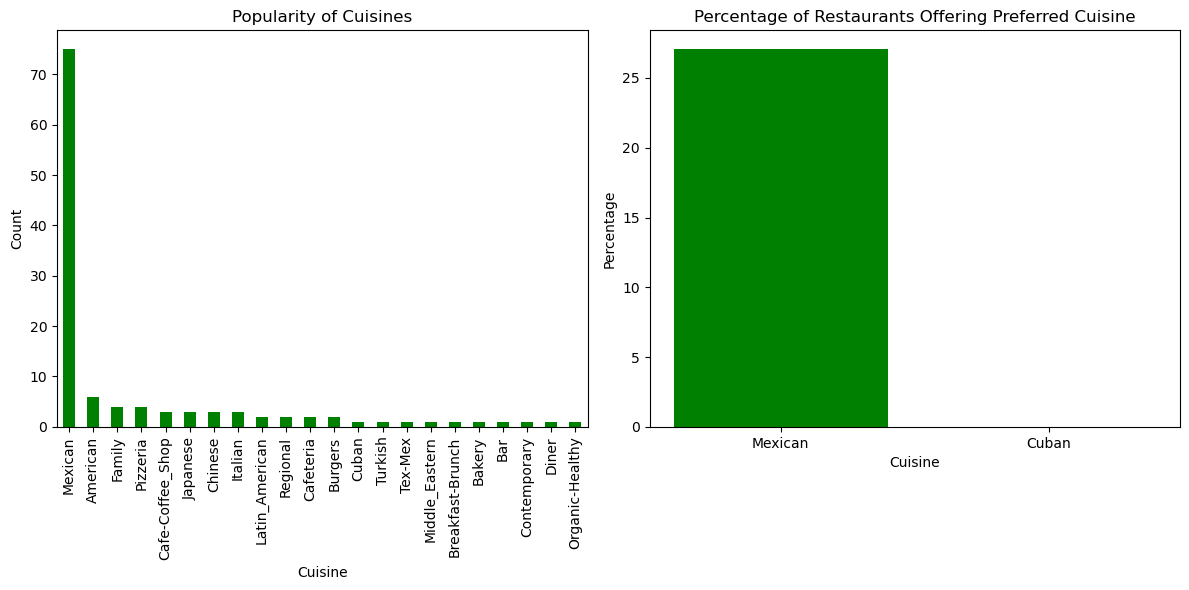

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the popularity of cuisines
cuisine_counts.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Popularity of Cuisines')
axes[0].set_xlabel('Cuisine')
axes[0].set_ylabel('Count')

# Plot the proportion of restaurants offering each preferred cuisine
proportions = [proportion_most_popular, proportion_least_popular]
cuisines = [most_popular_cuisine, least_popular_cuisine]

axes[1].bar(cuisines, proportions, color=['green', 'red'])
axes[1].set_title('Percentage of Restaurants Offering Preferred Cuisine')
axes[1].set_xlabel('Cuisine')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

The analysis reveals that Mexican cuisine is the most preferred among customers, whereas Cuban cuisine is the least favored. It also shows that about 27.06% of restaurants in the dataset offer the Mexican cuisine.

### Payment Method Preferences<a id='pay'></a>
Here are the most and least preferred payment methods, along with details of restaurants that accepts the preferred payment method.

In [37]:
payment_counts = final_table.groupby('userID')['preferred_payment'].first().value_counts()

most_preferred_payment = payment_counts.idxmax()
least_preferred_payment = payment_counts.idxmin()

print("Most Preferred Payment Method:", most_preferred_payment)
print("Least Preferred Payment Method:", least_preferred_payment)

Most Preferred Payment Method: cash
Least Preferred Payment Method: American_Express


In [38]:
unique_restaurants_most_preferred = final_table[final_table['accepted_payment'] == most_preferred_payment]['placeID'].nunique()
unique_restaurants_least_preferred = final_table[final_table['accepted_payment'] == least_preferred_payment]['placeID'].nunique()

proportion_most_preferred = round(unique_restaurants_most_preferred / total_restaurants_per_place * 100, 2)
proportion_least_preferred = round(unique_restaurants_least_preferred / total_restaurants_per_place * 100, 2)

print("Percentage of Restaurants Accepting the Most Preferred Payment Method:", proportion_most_preferred, "%")
print("Percentage of Restaurants Accepting the Least Preferred Payment Method:", proportion_least_preferred, "%")

Percentage of Restaurants Accepting the Most Preferred Payment Method: 100.0 %
Percentage of Restaurants Accepting the Least Preferred Payment Method: 22.35 %


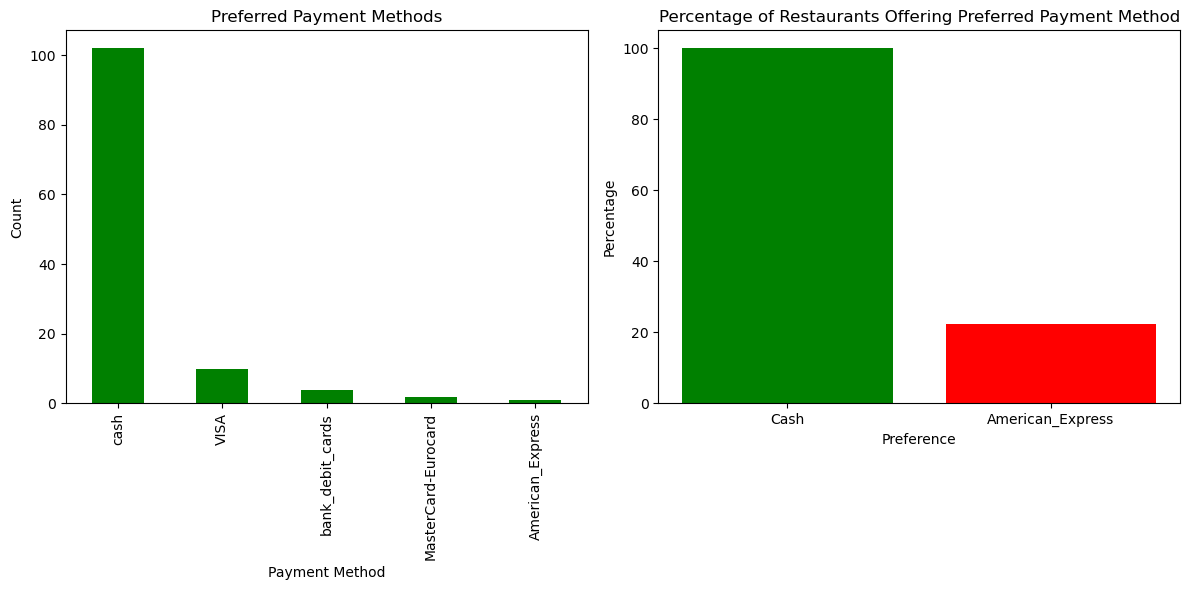

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the most and least preferred payment methods
payment_counts.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Preferred Payment Methods')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Count')

# Plot the proportion of restaurants offering the most preferred payment method
axes[1].bar(['Cash', 'American_Express'], [proportion_most_preferred, proportion_least_preferred], color=['green', 'red'])
axes[1].set_title('Percentage of Restaurants Offering Preferred Payment Method')
axes[1].set_xlabel('Preference')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

The analysis reveals that cash is the most preferred payment method among customers while American_Express is the least favored. It also shows that all restaurants accept cash payments but only 22.35% of the restaurants accept American_Express card.

### Smoking and Drinking Profile<a id='smok'></a>
The analysis below presents the percentage of customers who consume alcohol and smoke, as well as the restaurants that operate on weekend evenings, serve alcohol, and offer a smoking area.

In [40]:
smoking_proportion = final_table.groupby('userID')['smoker'].first().value_counts(normalize=True)['true'] * 100
drinking_proportion = final_table.groupby('userID')['drink_level'].first().value_counts(normalize=True)['social drinker'] * 100

print("Percentage of Smoking Customers:", round(smoking_proportion,2) ,"%")
print("Percentage of Drinking Customers:", round(drinking_proportion, 2) ,"%")

Percentage of Smoking Customers: 20.17 %
Percentage of Drinking Customers: 29.41 %


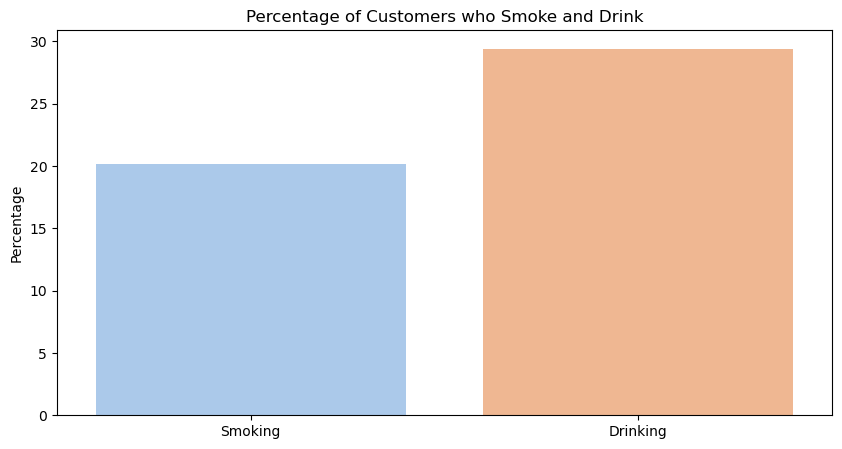

In [41]:
# Plotting the proportion of customers who smoke and drink
plt.figure(figsize=(10, 5))
sns.barplot(x=['Smoking', 'Drinking'], y=[smoking_proportion, drinking_proportion], palette='pastel')
plt.title('Percentage of Customers who Smoke and Drink')
plt.ylabel('Percentage')
plt.show()

In [42]:
filtered_restaurants = final_table[
    (final_table['days'].str.contains('Sat|Sun')) &
    (final_table['closing_time'].dt.time >= pd.Timestamp('20:00:00').time()) &
    (final_table['alcohol'].isin(['Full_Bar', 'Wine-Beer'])) &
    (final_table['smoking_area'].isin(['perimeter', 'only at bar', 'section']))
]

filtered_restaurants_per_place = filtered_restaurants['placeID'].nunique()
proportion_restaurants = filtered_restaurants_per_place / total_restaurants_per_place * 100

print("Percentage of Restaurants Open on Weekend Evenings and Offer Alcohol and Permit Smoking:", round(proportion_restaurants, 2) ,"%")

Percentage of Restaurants Open on Weekend Evenings and Offer Alcohol and Permit Smoking: 14.12 %


The analysis reveals that 20.17% of customers smoke, while 29.41% are social drinkers. Restaurants that are open on weekend evenings and offer alcohol & permit smoking is 14.12%.

### Customer Ratings on Restaurant<a id='rate'></a> 
Here is a concise summary analysis of customer ratings for restaurants.

In [43]:
# Step 1: Count the number of restaurants and calculate the average rating
num_restaurants = final_table['placeID'].nunique()
avg_rating = final_table['rating'].mean()

print("Number of Restaurants:", num_restaurants)
print("Average Rating:", round(avg_rating, 2))

Number of Restaurants: 85
Average Rating: 0.82


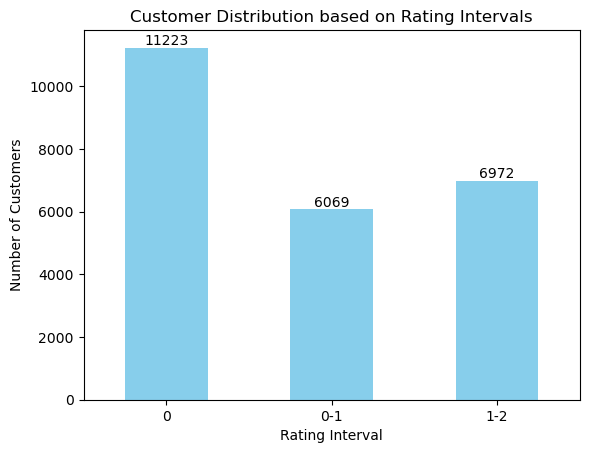

In [44]:
# Step 2: Create a pivot table for the distribution of customers based on rating intervals
bins = [-1, 0, 1, 2]
labels = ['0', '0-1', '1-2']
final_table['Rating Interval'] = pd.cut(final_table['rating'], bins=bins, labels=labels)
pivot_table = pd.pivot_table(final_table, values='userID', index='Rating Interval', aggfunc='count', margins=True, margins_name='Grand Total')

pivot_table.drop('Grand Total', inplace=True) 
ax = pivot_table.plot(kind='bar', legend=None, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Rating Interval')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution based on Rating Intervals')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [45]:
# Step 3: Identify the top 5 rated restaurants along with their names and main cuisine names
top_rated_restaurants = final_table.groupby('placeID').agg({'rating': ['mean', 'count'], 'name': 'first', 'cuisine_offered': 'first'})
top_rated_restaurants.columns = ['Rating', 'Number of Customers', 'Name', 'Cuisine Offered'] 
top_rated_restaurants = top_rated_restaurants.nlargest(5, 'Rating').round(2)  

print("\nTop 5 Rated Restaurants:")
top_rated_restaurants[['Name', 'Rating', 'Number of Customers', 'Cuisine Offered']]


Top 5 Rated Restaurants:


,Name,Rating,Number of Customers,Cuisine Offered
placeID,,,,
132955,emilianos,2.00,75,Bar_Pub_Brewery
135034,Michiko Restaurant Japones,2.00,60,Japanese
135074,Restaurante la Parroquia Potosina,1.98,504,Contemporary
132723,Gordas de morales,1.92,384,Mexican
135075,Mariscos El Pescador,1.91,210,Seafood


<div style="overflow: scroll; height: 300px;">

**Interpretation:**

***Number of Restaurants and Average Rating:***

Total restaurants: 85

Average rating: 0.82


***Customer Distribution based on Rating Intervals:***

Most customers gave ratings in the 0 (11,223), followed by the 1-2 interval (6,972).


***Top 5 Rated Restaurants:***

These restaurants have the highest average ratings.

|  Name  | Cuisine Offered | 
|---         |---       |
| **emilianos** | Bar_Pub_Brewery |
| **Michiko Restaurant Japones** | Japanese |
| **Restaurante la Parroquia Potosina** | Contemporary |
| **Gordas de morales** | Mexican |
| **Mariscos El Pescador** | Seafood |


They offer various cuisines, indicating diverse customer preferences.
</div>